## r/place Conflict Analysis

Looking at a CSV of features to reason about the factors most associated with winning a conflict.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("conflicts2.csv")
len(df)

196

In [4]:
df.head()

,conflictID,BaseCommunity,AttackCommunity,BaseUsers,AttackUsers,NumberOfBase PP,NumberOfAttack PP,NumberofBaseWithoutUnsure PP,NumberofAttackWithoutUnsure,MeanofBase PP,MeanofAttack PP,STDofBase PP,STDofAttack PP,Type Of Conflict
0,6953,promos\t2.62\nshittyfoodporn\t1.86\nwallstreet...,Tinder\t2.78\nbuildapc\t2.34\nStarWars\t2.24\n...,494,486,2071,2079,1524,1524,3.066398,3.129363,3.005297,2.762632,many-many
1,21519,Argaming\t27.77\nargentina\t7.97\nMercadoreddi...,The_Donald\t3.16\nnfl\t3.04\nbuildapc\t2.78\np...,1154,445,3161,992,3087,822,2.672727,1.847191,3.221719,1.936990,one-many
2,4546,Steam\t6.04\npcmasterrace\t4.68\npcgaming\t3.1...,xboxone\t2.52\nWTF\t2.23\nnews\t1.99\nGames\t1...,240,68,377,130,363,114,1.512500,1.676471,1.102955,1.333297,many-many
3,3251,youtube\t4.65\nRainmeter\t3.31\nTheSilphRoad\t...,BikiniBottomTwitter\t5.46\ngatekeeping\t3.28\n...,2534,1689,7266,5189,5851,3307,2.297212,1.938453,2.647161,2.130631,many-one
4,2734,Undertale\t2.74\nplace\t1.41\nfunny\t1.16\nAsk...,mildlyinteresting\t2.05\nShowerthoughts\t1.62\...,117,95,205,146,194,133,1.658120,1.400000,1.612782,1.226033,one-many


### Visualization

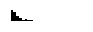

(735.1989795918367, 825.9227222084298, 423.0)

In [15]:
fig, ax = plt.subplots(1, figsize=(1,0.4), squeeze=True)

plt.hist(df.BaseUsers, log=False, bins=26, align='left', color='black')

ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

plt.tight_layout(pad=0)
plt.subplots_adjust(top = 0.4, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

bbox = matplotlib.transforms.Bbox.from_bounds(0,0,1,0.2)
image_filename = "baseusers_hist.pdf"
plt.savefig(image_filename, format='pdf', dpi=200, pad_inches=0, bbox_inches=bbox) #, transparent=True)
plt.show()
np.mean(df.BaseUsers), np.std(df.BaseUsers), np.median(df.BaseUsers)

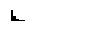

(410.1887755102041, 593.5048441909234, 199.5)

In [16]:
x = df.AttackUsers
fig, ax = plt.subplots(1, figsize=(1,0.4), squeeze=True)

plt.hist(x, log=False, bins=26, align='left', color='black')

ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

plt.tight_layout(pad=0)
plt.subplots_adjust(top = 0.4, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

bbox = matplotlib.transforms.Bbox.from_bounds(0,0,1,0.2)
image_filename = "attackusers_hist.pdf"
plt.savefig(image_filename, format='pdf', dpi=200, pad_inches=0, bbox_inches=bbox) #, transparent=True)
plt.show()
np.mean(x), np.std(x), np.median(x)

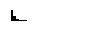

(1950.3469387755101, 2690.762395193711, 911.0)

In [17]:
x = df['NumberOfBase PP']
fig, ax = plt.subplots(1, figsize=(1,0.4), squeeze=True)

plt.hist(x, log=False, bins=26, align='left', color='black')

ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

plt.tight_layout(pad=0)
plt.subplots_adjust(top = 0.4, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

bbox = matplotlib.transforms.Bbox.from_bounds(0,0,1,0.2)
image_filename = "basepp_hist.pdf"
plt.savefig(image_filename, format='pdf', dpi=200, pad_inches=0, bbox_inches=bbox) #, transparent=True)
plt.show()
np.mean(x), np.std(x), np.median(x)

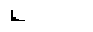

(1020.734693877551, 1690.20659618164, 436.5)

In [18]:
x = df['NumberOfAttack PP']
fig, ax = plt.subplots(1, figsize=(1,0.4), squeeze=True)

plt.hist(x, log=False, bins=26, align='left', color='black')

ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

plt.tight_layout(pad=0)
plt.subplots_adjust(top = 0.4, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

bbox = matplotlib.transforms.Bbox.from_bounds(0,0,1,0.2)
image_filename = "attackpp_hist.pdf"
plt.savefig(image_filename, format='pdf', dpi=200, pad_inches=0, bbox_inches=bbox) #, transparent=True)
plt.show()
np.mean(x), np.std(x), np.median(x)

#### Produce conflict length figures

In [19]:
length_df = pd.read_csv("conflictLen.csv")
len(length_df)

196

In [20]:
# no actual need to merge unless we want to compare conflict length to some other feature of the conflicts
#length_df.merge(df[['conflictID']], how='left')

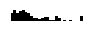

(5.759013605442174, 3.4377107590449545, 4.591666666666667)

In [21]:
x = length_df['length'] / 60
fig, ax = plt.subplots(1, figsize=(1,0.4), squeeze=True)

plt.hist(x, log=False, bins=26, align='left', color='black')

ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

plt.tight_layout(pad=0)
plt.subplots_adjust(top = 0.4, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

bbox = matplotlib.transforms.Bbox.from_bounds(0,0,1,0.2)
image_filename = "length_hist.pdf"
plt.savefig(image_filename, format='pdf', dpi=200, pad_inches=0, bbox_inches=bbox) #, transparent=True)
plt.show()
np.mean(x), np.std(x), np.median(x)

### Analysis

In [7]:
# this shuffles the data-order
df = df.sample(frac=1)

In [8]:
df.head()

,conflictID,BaseCommunity,AttackCommunity,BaseUsers,AttackUsers,NumberOfBase PP,NumberOfAttack PP,NumberofBaseWithoutUnsure PP,NumberofAttackWithoutUnsure,MeanofBase PP,MeanofAttack PP,STDofBase PP,STDofAttack PP,Type Of Conflict
115,9301,gameofthrones\t2.55\npussypassdenied\t2.47\nPr...,Idubbbz\t3.74\nJonTron\t3.54\noldpeoplefaceboo...,1166,1143,2886,2423,2567,1933,2.197774,1.686736,2.936152,2.160356,many-many
168,18595,transgender\t60.59\ntranspassing\t58.09\nasktr...,dbz\t6.96\nBattlefield\t4.84\nguns\t3.51\nThe_...,2225,1879,9578,5444,9116,4996,4.089726,2.657447,5.357144,3.456523,many-one
44,9127,AnnArbor\t10.24\nuofm\t9.92\nSuomi\t6.7\nGoogl...,msu\t6.62\nOhioStateFootball\t5.62\nclevelandc...,2446,1878,15119,7947,13849,5978,5.636549,3.166314,9.017878,4.445871,many-many
32,15093,GlobalOffensive\t6.8\ninterestingasfuck\t2.56\...,dankmemes\t2.92\nnfl\t2.76\nMemeEconomy\t1.72\...,616,152,1032,305,971,236,1.576299,1.552632,1.467402,1.207376,one-many
100,18567,runescape\t4.47\n2007scape\t3.53\nleagueoflege...,PurplePixels\t4.93\nAdviceAnimals\t2.63\nWTF\t...,291,220,624,507,522,398,1.793814,1.800905,1.554982,1.796477,many-one


In [9]:
df.columns

Index(['conflictID', 'BaseCommunity', 'AttackCommunity', 'BaseUsers',
       'AttackUsers', 'NumberOfBase PP', 'NumberOfAttack PP',
       'NumberofBaseWithoutUnsure PP', 'NumberofAttackWithoutUnsure',
       'MeanofBase PP', 'MeanofAttack PP', 'STDofBase PP', 'STDofAttack PP',
       'Type Of Conflict'],
      dtype='object')

In [10]:
def print_feature_summary(res):
    for feature, coef in zip(res.params.index, res.params):
        prob = np.exp(coef)/(1+np.exp(coef))
        feature_name = feature
        if "health_condition" in feature_name:
            feature_name = "health_condition " + feature_name.split("[")[1][2:-1]
        print(f"{feature_name:<50} {min((np.exp(coef)-1)*100, 999):>8.3f}% increase   {prob*100:>8.2f}%   ({np.exp(coef):.3f})")

In [32]:
l = []
for i, row in df.iterrows():
    d1 = {
        'is_winner': 1,
        'user_count': row['BaseUsers'],
        'placement_count': row['NumberOfBase PP'],
        'mean_placements': row['MeanofBase PP'],
        'std_placements': row['STDofBase PP'],
        'conflict_type': row['Type Of Conflict']
    }
    d2 = {
        'is_winner': 0,
        'user_count': row['AttackUsers'],
        'placement_count': row['NumberOfAttack PP'],
        'mean_placements': row['MeanofAttack PP'],
        'std_placements': row['STDofAttack PP'],
        'conflict_type': row['Type Of Conflict']
    }
    l.append(d1)
    l.append(d2)
mdf = pd.DataFrame(l)
len(mdf)

392

In [34]:
formula = """
is_winner ~ 
    user_count
    + placement_count
    + mean_placements
    + std_placements
    
    + 1
"""
# + C(conflict_type, Treatment(reference='many-many'))
model = smf.logit(formula=formula, 
                  data=mdf)
res = model.fit(maxiter=100)
res.summary()

Optimization terminated successfully.
         Current function value: 0.550717
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_winner   No. Observations:                  392
Model:                          Logit   Df Residuals:                      387
Method:                           MLE   Df Model:                            4
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.2055
Time:                        16:08:16   Log-Likelihood:                -215.88
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 3.212e-23
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.7407      0.722     -7.955      0.000      -7.155      -4.326
user_count          0.0032      0.001      4.972      0.000       0.002       0.004
placement_count    -0.0007      0.000     -3.396      0.001      -0.001      -0.000
mean_placements     4.6679      0.658      7.097      0.000       3.379       5.957
std_placements     -2.0694      0.369     -5.613      0.000      -2.792      -1.347
===================================================================================
"""

In [35]:
print_feature_summary(res)

Intercept                                           -99.679% increase       0.32%   (0.003)
user_count                                            0.320% increase      50.08%   (1.003)
placement_count                                      -0.074% increase      49.98%   (0.999)
mean_placements                                     999.000% increase      99.07%   (106.476)
std_placements                                      -87.374% increase      11.21%   (0.126)


In [24]:
mdf.describe()

,is_winner,mean_placements,placement_count,std_placements,user_count
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.500000,2.056527,1485.540816,2.165129,572.693878
std,0.500639,0.764658,2297.391857,1.306273,738.238699
min,0.000000,1.025641,57.000000,0.158062,36.000000
25%,0.000000,1.553449,337.000000,1.262776,163.000000
50%,0.500000,1.845471,656.500000,1.860729,294.000000
75%,1.000000,2.361673,1503.750000,2.685138,639.250000
max,1.000000,6.192214,15778.000000,9.017878,5454.000000


In [29]:
formula = """
is_winner ~ 
    user_count
    + mean_placements
    + 1
"""
# + num_sites OR is_multisite_author
# + health_condition
model = smf.logit(formula=formula, 
                  data=mdf)
res = model.fit(maxiter=100)
res.summary()

Optimization terminated successfully.
         Current function value: 0.628232
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_winner   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                 0.09365
Time:                        16:05:35   Log-Likelihood:                -246.27
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 8.886e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.1057      0.378     -5.572      0.000      -2.846      -1.365
user_count          0.0006      0.000      2.936      0.003       0.000       0.001
mean_placements     0.8962      0.186      4.811      0.000       0.531       1.261
===================================================================================
"""

In [12]:
df['user_count_delta'] = df.BaseUsers - df.AttackUsers
df['placement_count_delta'] = df['NumberOfBase PP'] - df['NumberOfAttack PP']
df['mean_placements_delta'] = df['MeanofBase PP'] - df['MeanofAttack PP']
df['std_placements_delta'] = df['STDofBase PP'] - df['STDofAttack PP']
df['placement_wo_unsure_count_delta'] = df['NumberofBaseWithoutUnsure PP'] - df['NumberofAttackWithoutUnsure']

In [68]:
l = []
count = 0
df = df.sample(frac=1)
for i, row in df.iterrows():
    if True: #count % 2 == 0:
        d = {
            'is_winner': 1,
            'user_count_delta': row['user_count_delta'],
            'placement_count_delta': row['placement_count_delta'],
            'placement_wo_unsure_count_delta': row['placement_wo_unsure_count_delta'],
            'mean_placements_delta': row['mean_placements_delta'],
            'std_placements_delta': row['std_placements_delta'],
        }
    else:
        d = {
            'is_winner': 0,
            'user_count_delta': row['user_count_delta'] * -1,
            'placement_count_delta': row['placement_count_delta'] * -1,
            'placement_wo_unsure_count_delta': row['placement_wo_unsure_count_delta'] * -1,
            'mean_placements_delta': row['mean_placements_delta'] * -1,
            'std_placements_delta': row['std_placements_delta'] * -1,
        }
    l.append(d)
    count += 1
mdf = pd.DataFrame(l)
len(mdf)

196

In [69]:
mdf.describe()

,is_winner,mean_placements_delta,placement_count_delta,placement_wo_unsure_count_delta,std_placements_delta,user_count_delta
count,196.0,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.0,0.459196,929.612245,1016.413265,0.522310,325.010204
std,0.0,0.714760,1260.620219,1373.061194,1.153615,429.505834
min,1.0,-1.307129,-407.000000,-398.000000,-3.999633,-401.000000
25%,1.0,0.049607,226.750000,235.500000,-0.105199,90.750000
50%,1.0,0.313095,453.500000,487.000000,0.391636,185.500000
75%,1.0,0.722367,1213.750000,1258.250000,0.998587,400.500000
max,1.0,3.921222,9591.000000,9963.000000,5.088358,3193.000000


In [42]:
from collections import Counter
Counter(mdf.is_winner).most_common()

[(1, 196)]

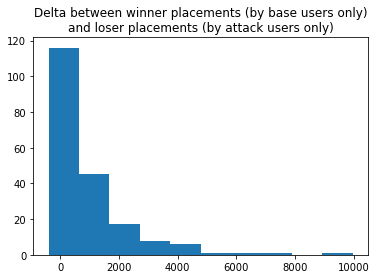

In [70]:
plt.hist(mdf.placement_wo_unsure_count_delta)
plt.title("Delta between winner placements (by base users only)\nand loser placements (by attack users only)")
plt.show()

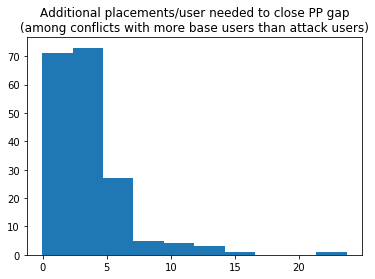

(185, 3.5333305941065904, 2.8350951374207187)

In [71]:
l = []
w = []
for i, row in df.iterrows():
    placement_wo_unsure_count_delta = row['placement_wo_unsure_count_delta']
    if row.BaseUsers > row.AttackUsers:
        # more base users than attack users
        # how many additional pixels would the attackers have had to place to close the gap?
        additional_placements_needed = placement_wo_unsure_count_delta / row.AttackUsers
        l.append(additional_placements_needed)
        
plt.hist(l)
plt.title("Additional placements/user needed to close PP gap\n(among conflicts with more base users than attack users)")
plt.show()
len(l), np.mean(l), np.median(l)

In [72]:
np.median(df['MeanofAttack PP']), np.median(df['MeanofBase PP'])

(1.7214703181097102, 2.076874182669772)

In [73]:
# for the losers to have placed more pixels (and thus to have won)
# they would need to place a median of 5.46 placements/user compared to the actual median of 1.72 placements/user
# which is a 265% increase in each user's activity
np.median(df['MeanofAttack PP']) + np.median(l), (np.median(df['MeanofAttack PP']) + np.median(l)) / np.median(df['MeanofAttack PP']) * 100

(4.5565654555304285, 264.69032940015154)

In [74]:
np.sum((mdf.placement_wo_unsure_count_delta >= 0) == mdf.is_winner) / len(mdf), \
np.sum((mdf.placement_count_delta >= 0) == mdf.is_winner) / len(mdf)

(0.9897959183673469, 0.9795918367346939)

In [75]:
np.sum((mdf.user_count_delta >= 0) == mdf.is_winner) / len(mdf), \
np.sum((mdf.mean_placements_delta >= 0) == mdf.is_winner) / len(mdf), \
np.sum((mdf.std_placements_delta >= 0) == mdf.is_winner) / len(mdf), \

(0.9438775510204082, 0.7755102040816326, 0.6938775510204082)

In [76]:
mdf['user_count_delta_positive'] = mdf.user_count_delta >= 0
mdf['mean_placements_delta_positive'] = mdf.mean_placements_delta >= 0

In [77]:
# No conflict was won without EITHER a higher avg placements per user OR a higher user count.
# In general, higher user count is more relevant than greater placements per user
pd.pivot_table(mdf, 
               index='user_count_delta_positive', 
               columns='mean_placements_delta_positive', 
               values='is_winner', margins=True, aggfunc=np.sum)

mean_placements_delta_positive,False,True,All
user_count_delta_positive,,,
False,NaN,11.0,11
True,44.0,141.0,185
All,44.0,152.0,196


In [78]:
len(mdf[mdf.user_count_delta_positive & ~mdf.mean_placements_delta_positive])

44

In [79]:
np.sum(((mdf.user_count_delta >= 0) & (mdf.mean_placements_delta >= 0)) == mdf.is_winner) / len(mdf)

0.7193877551020408

In [80]:
# is it more important to have MORE TOTAL users or to have fewer users that are MORE ACTIVE?
# one EXTRA USER is equivalent to X additional mean placements

One potential discussion point:

In contrast to other online settings [citation needed], conflicts on r/place are decided by lots of regular users and not by a small number of superusers.  We think that the reason for this more equitable environment for inter-community conflict is the rate-limiting of individual users, which causes sheer numbers to be more important than average level of investment, since total contribution of a single user is capped. 

Social media hoping to explicitly design for inter-community conflicts (ideological or otherwise) might think about incorporating rate-limiting as a way to construct conflicts that are more demographic in their outcomes and less controlled by the actions of a small number of highly-engaged users.

In [21]:
formula = """
is_winner ~ 
    user_count_delta
    + placement_count_delta
    + mean_placements_delta
    + std_placements_delta
    + 1
"""
formula = """
is_winner ~ 
    user_count_delta
    + mean_placements_delta
    + 1
"""
model = smf.logit(formula=formula, 
                  data=mdf)
res = model.fit(maxiter=100)
print_feature_summary(res)
res.summary()

Optimization terminated successfully.
         Current function value: 0.152031
         Iterations 10
Intercept                                            66.177% increase      62.43%   (1.662)
user_count_delta                                      1.744% increase      50.43%   (1.017)
mean_placements_delta                               999.000% increase      93.89%   (15.365)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_winner   No. Observations:                  196
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Jun 2020   Pseudo R-squ.:                  0.7807
Time:                        15:12:20   Log-Likelihood:                -29.798
converged:                       True   LL-Null:                       -135.86
Covariance Type:            nonrobust   LLR p-value:                 8.695e-47
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5079      0.360      1.411      0.158      -0.198       1.213
user_count_delta          0.0173      0.003      5.795      0.000       0.011       0.023
mean_placements_delta     2.7321      0.656      4.165      0.000       1.446       4.018
=========================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

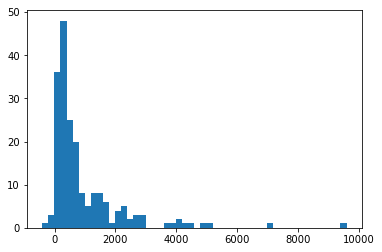

In [45]:
plt.hist(df.placement_count_delta, bins=50)
plt.show()